In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
df = pd.read_csv("Boston.csv")
# Preview
print(df.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB
None


In [111]:
import os
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings

In [89]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [91]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [93]:
# Check for missing values
print(df.isna().sum())

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64


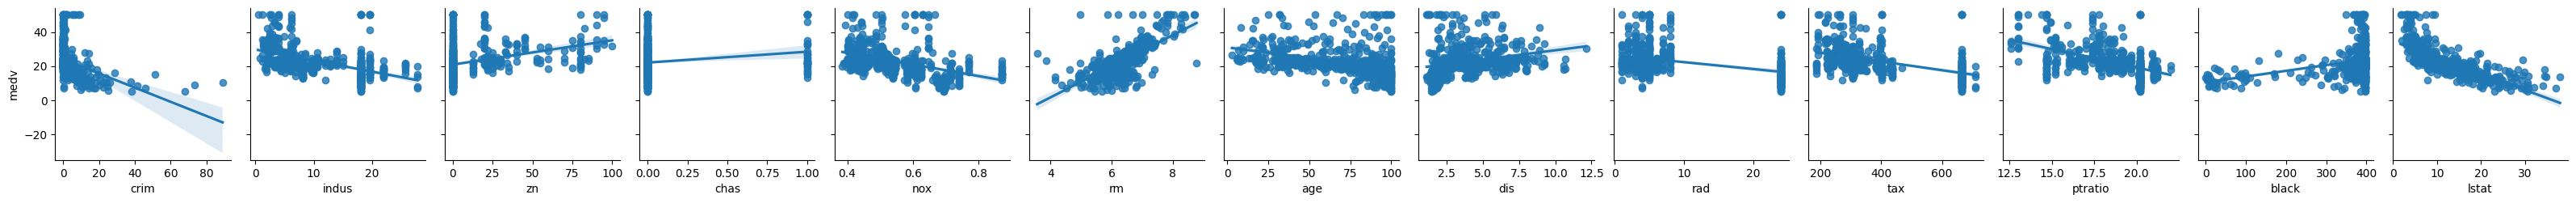

In [95]:
sns.pairplot(df, x_vars=['crim', 'indus', 'zn', 'chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat'], y_vars='medv', kind="reg")

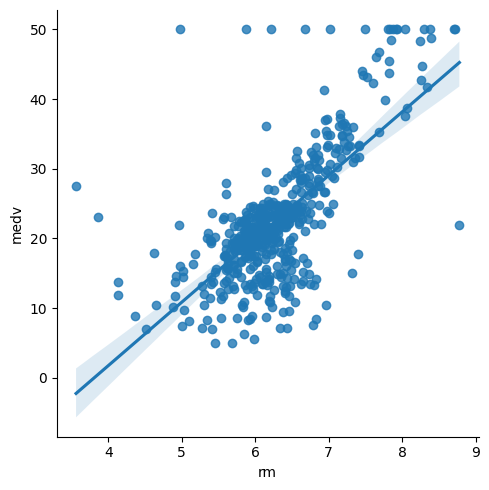

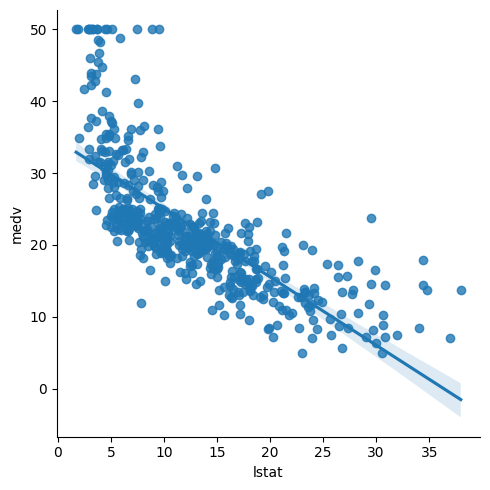

In [96]:
sns.lmplot(x='rm', y='medv', data=df)
sns.lmplot(x='lstat', y='medv', data=df)

In [97]:
X = df[['crim', 'indus', 'zn', 'chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
# Target variable
y = df['medv']
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False) 

In [98]:
print("\nTraining samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 404
Testing samples: 102


In [99]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred = model.predict(X_test)

In [117]:
predictions = model.predict(X)
r2 = model.rsquared
mse = np.mean((y - predictions)**2)
rmse = np.sqrt(mse)
print("Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Root Mean Squared Error (RMSE): 4.68
R² Score: 0.7406


R² score close to 1 tells that the model is working accurately

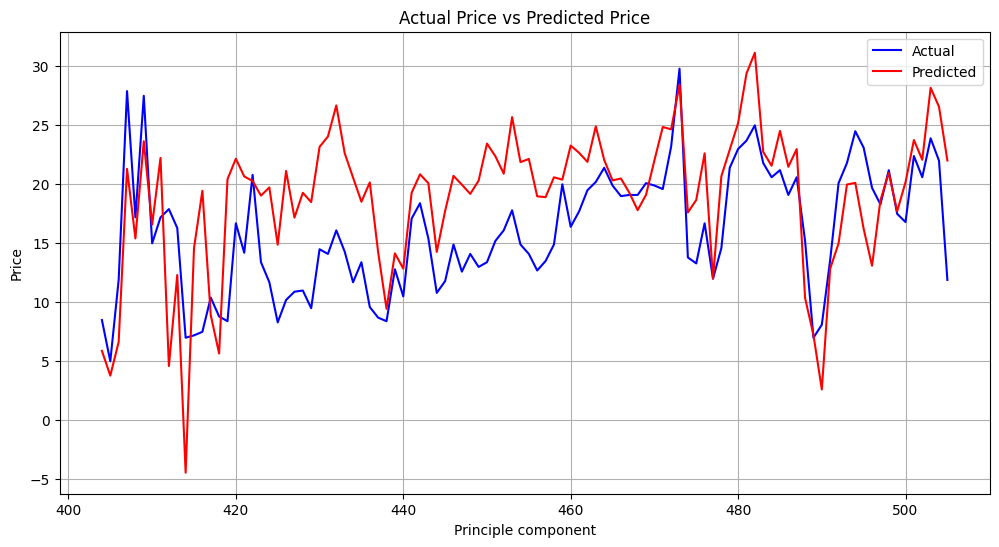

In [73]:
y_pred_series = pd.Series(y_pred, index=y_test.index)
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_series, label='Predicted', color='red')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Principle component')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
last_row = df[['crim', 'indus', 'zn', 'chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']].iloc[-1]
next_day_pred = model.predict([last_row])[0]

print(f"Predicted Price in thousand dollars: {next_day_pred:.2f}")

Predicted Price: 22.02


In [113]:
X = df[['crim', 'indus', 'zn', 'chas', 'nox', 'rm','age','dis','rad','tax','ptratio','black','lstat']]
y = df['medv']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
# Durbin-Watson test
dw_stat = durbin_watson(model.resid)
print(f"Durbin-Watson statistic: {dw_stat:.3f}")

Durbin-Watson statistic: 1.078


Durbin-Watson statistic is approximately 1.078, thus there is positive autocorrelation.